In [218]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [219]:
td=sns.load_dataset("titanic")
td.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True


In [220]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [221]:
td.describe().T # Transpose

,count,mean,std,min,25%,50%,75%,max
survived,891.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00
pclass,891.00,2.31,0.84,1.00,2.00,3.00,3.00,3.00
age,714.00,29.70,14.53,0.42,20.12,28.00,38.00,80.00
sibsp,891.00,0.52,1.10,0.00,0.00,0.00,1.00,8.00
parch,891.00,0.38,0.81,0.00,0.00,0.00,0.00,6.00
fare,891.00,32.20,49.69,0.00,7.91,14.45,31.00,512.33


### Exploratory data analysis (EDA) 

In [222]:
td

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.10,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.00,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.00,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True


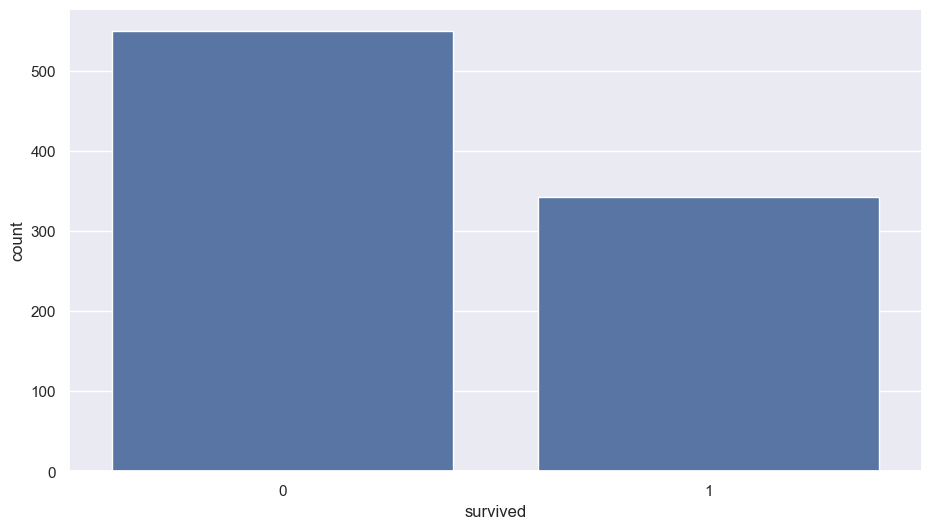

In [223]:
sns.countplot(x=td.survived,data=td)
plt.show()

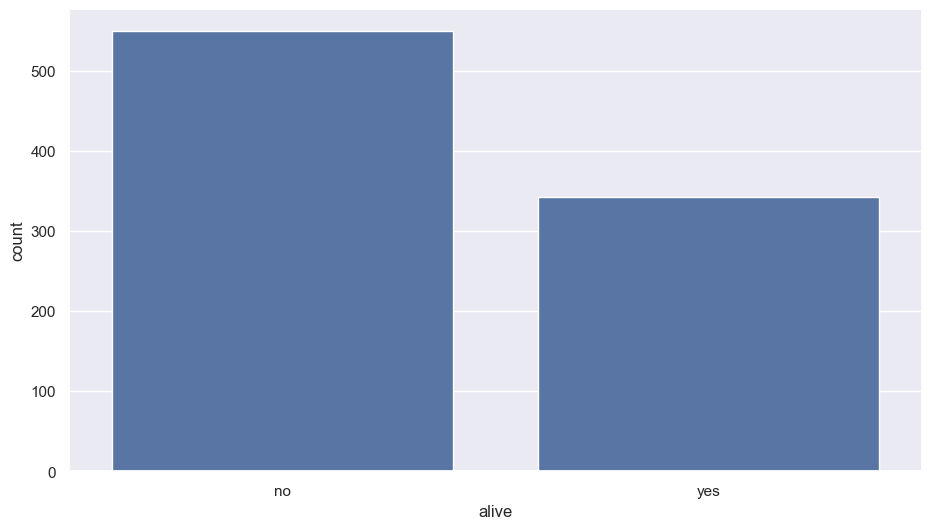

In [224]:
sns.countplot(x=td.alive,data=td) # same as survived
plt.show()

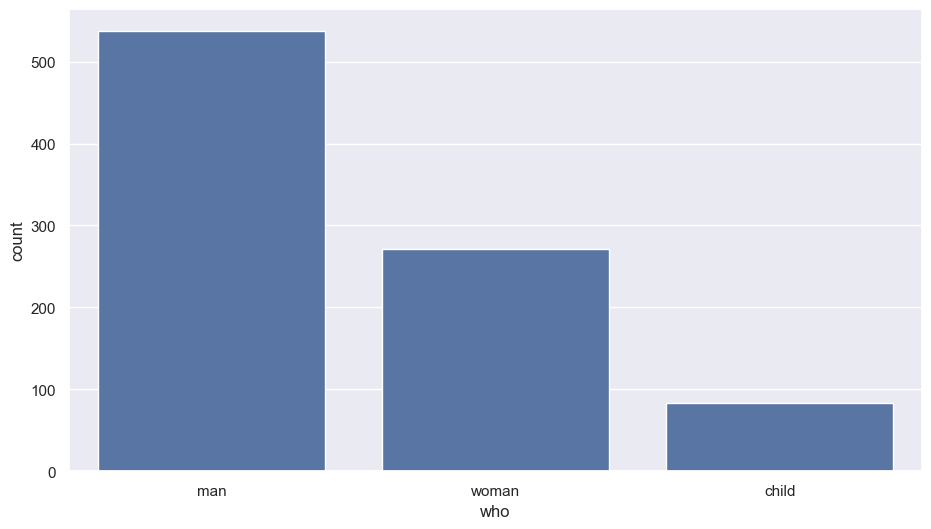

In [225]:
sns.countplot(x=td.who,data=td)
plt.show()

In [226]:
td.who.value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

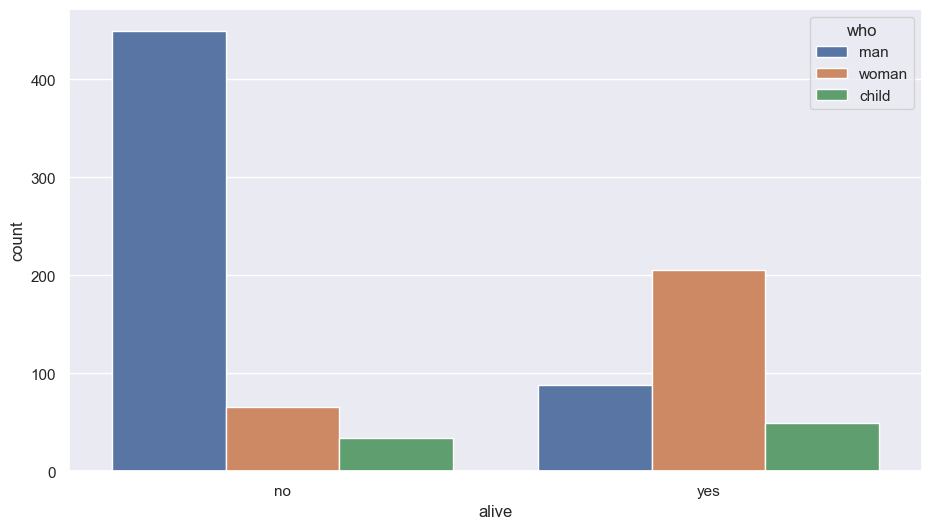

In [227]:
sns.countplot(x=td.alive,hue=td.who,data=td) # hue is for sub division
plt.show()

In [228]:
pd.crosstab(td.who,td.survived)

survived,0,1
who,,
child,34,49
man,449,88
woman,66,205


man are diying more , female survived and so did child

# ---------------------------------
SWAP the names of above to get this

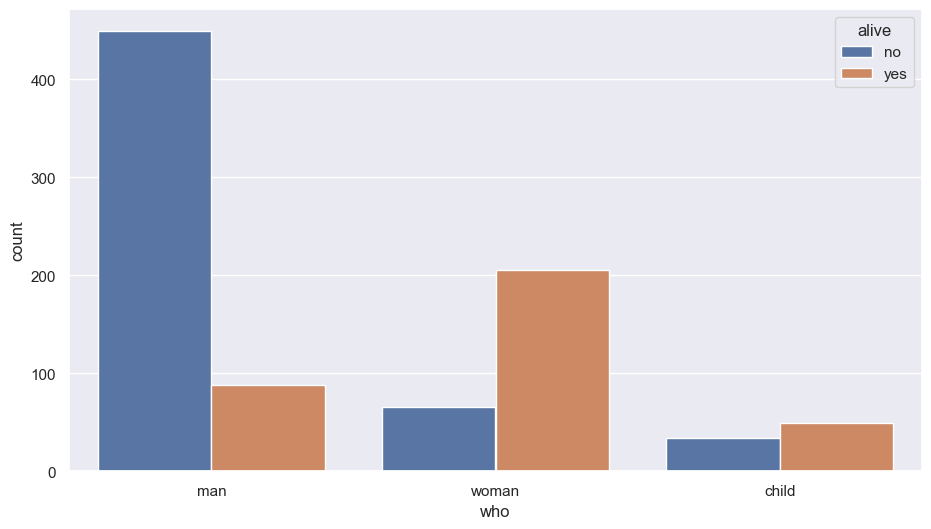

In [229]:
sns.countplot(x=td.who,hue=td.alive,data=td)
plt.show()

In [230]:
td.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


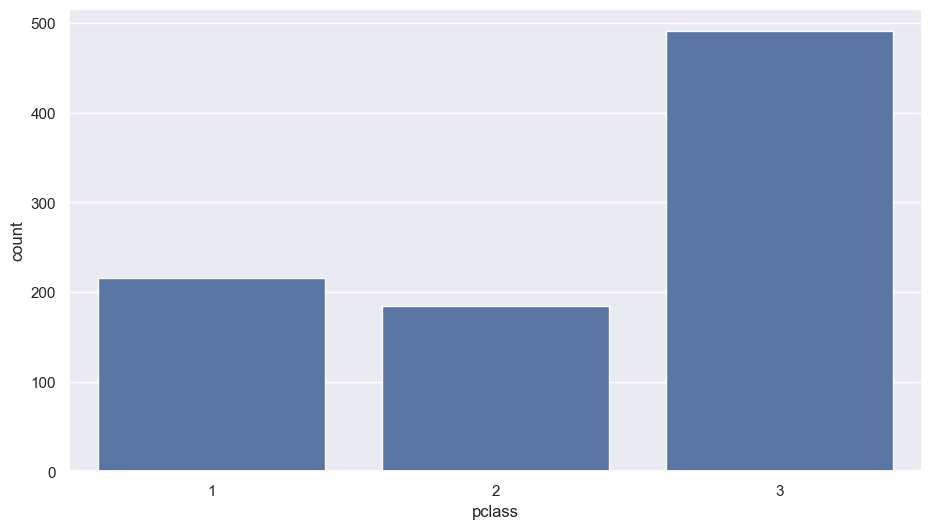

In [231]:
sns.countplot(x=td.pclass,data=td)
plt.show()

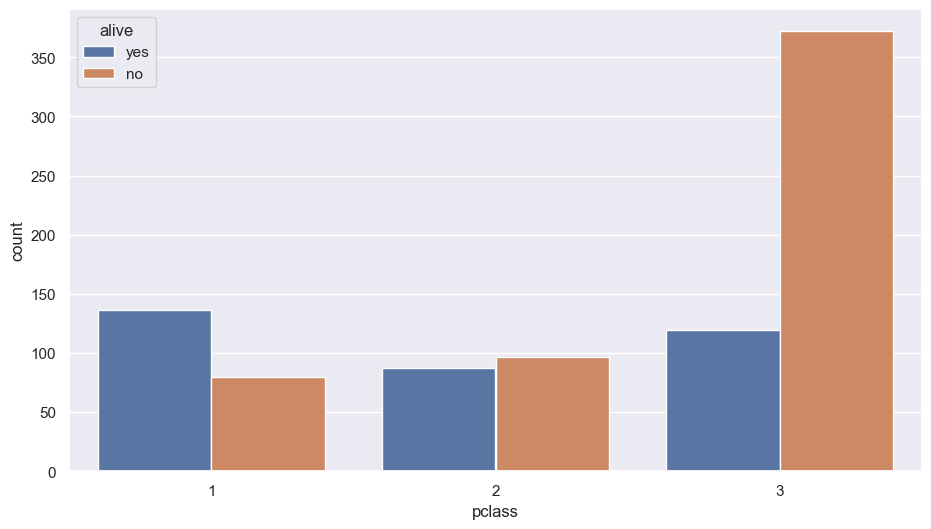

In [232]:
sns.countplot(x=td.pclass,hue=td.alive,data=td)
plt.show()

In [233]:
pd.crosstab(td.pclass,td.alive)

alive,no,yes
pclass,,
1,80,136
2,97,87
3,372,119


People who belong to first class have high probablity of survival

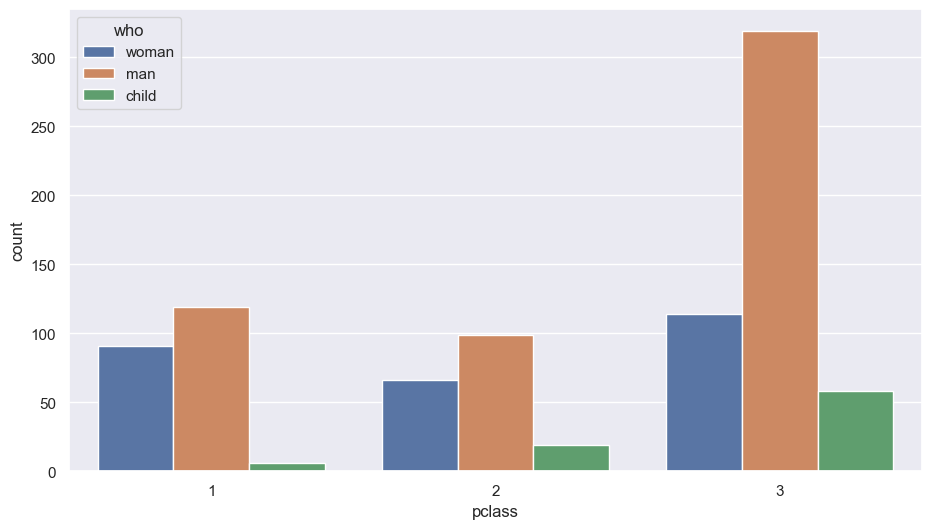

In [234]:
sns.countplot(x=td.pclass,hue=td.who,data=td)
plt.show()

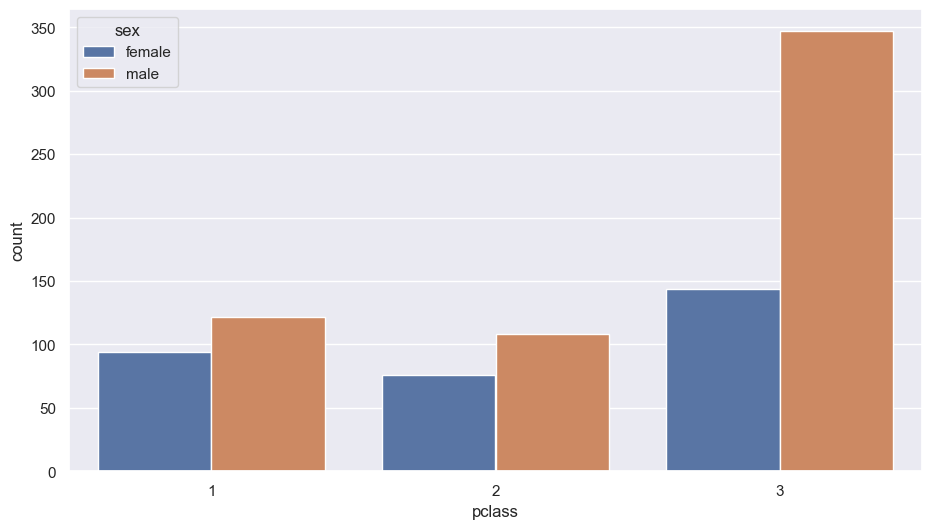

In [235]:
sns.countplot(x=td.pclass,hue=td.sex,data=td)
plt.show()

In [236]:
td.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


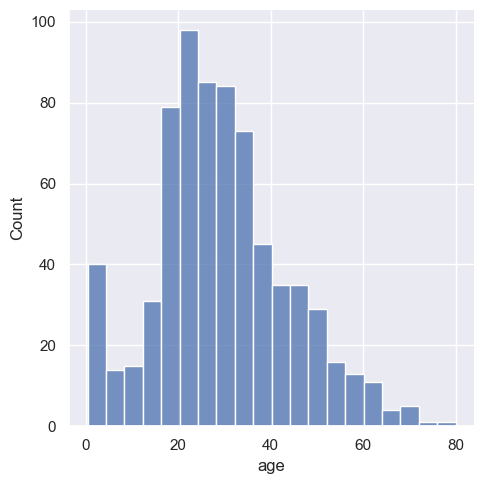

In [237]:
sns.displot(x=td.age,data=td)
plt.show()

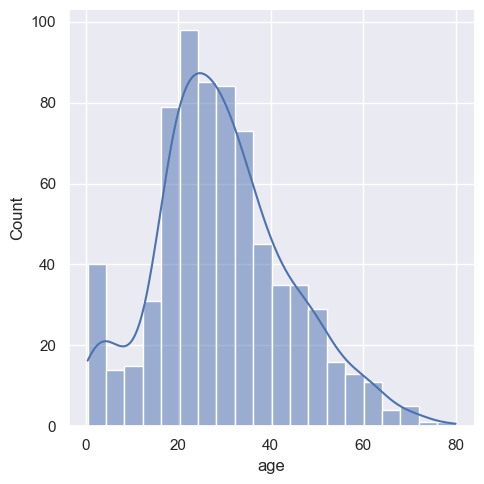

In [238]:
sns.displot(x=td.age,data=td,kde=True) #KDE=kernal density 
plt.show()

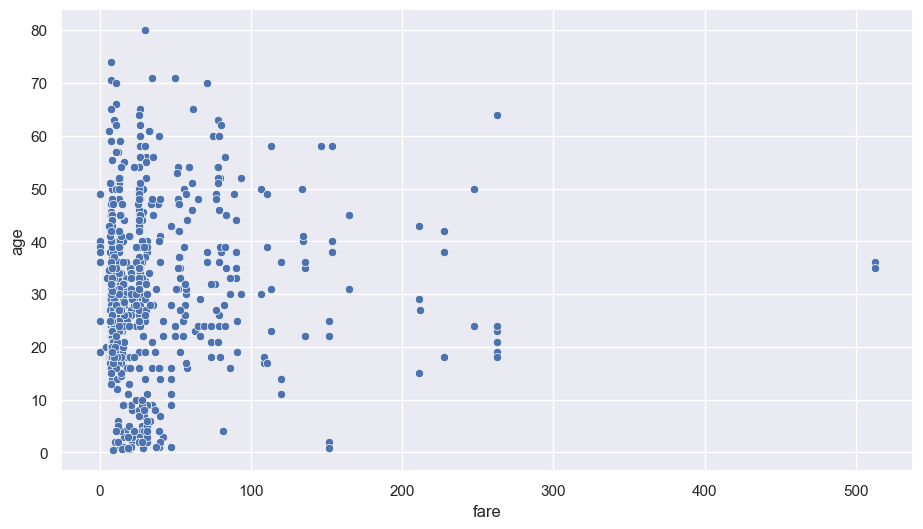

In [239]:
sns.scatterplot(x=td.fare,y=td.age,data=td)  
plt.show()

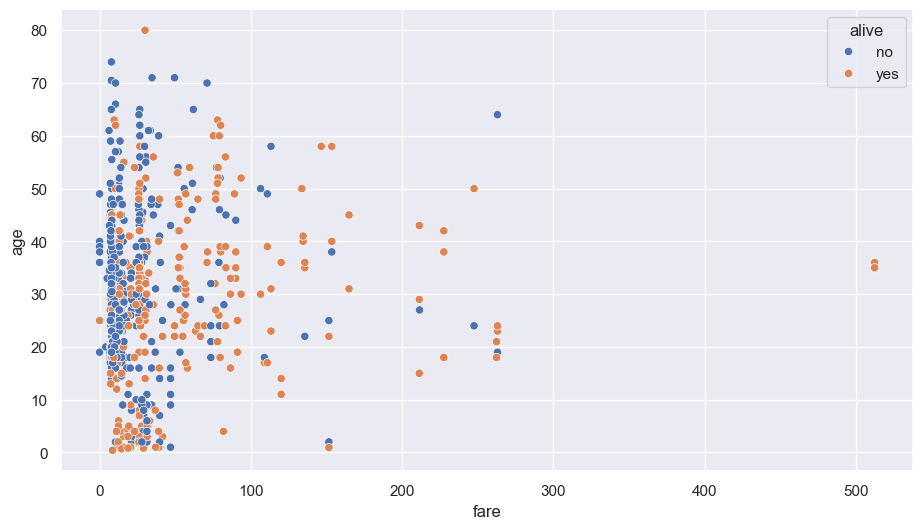

In [240]:
sns.scatterplot(x=td.fare,y=td.age,hue=td.alive,data=td) 
plt.show()

sibsp	parch

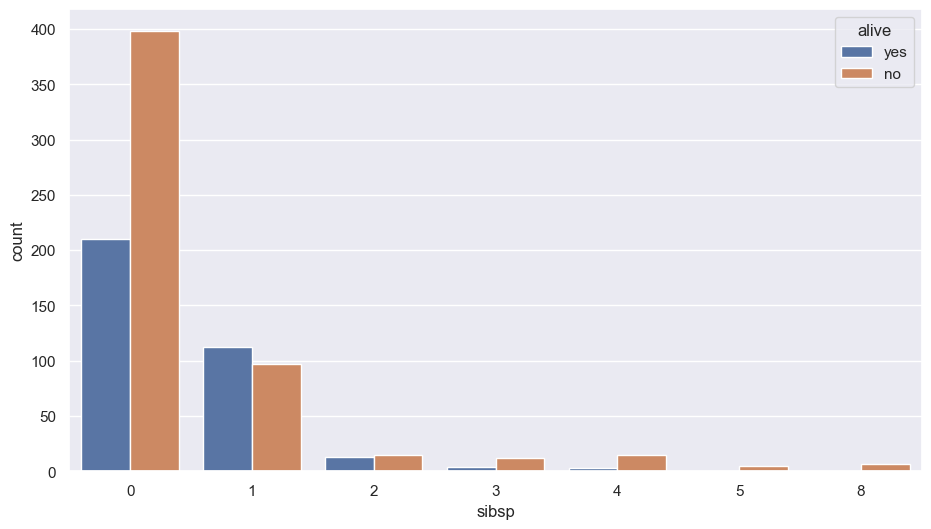

In [241]:
sns.countplot(x=td.sibsp,hue=td.alive,data=td)
plt.show()

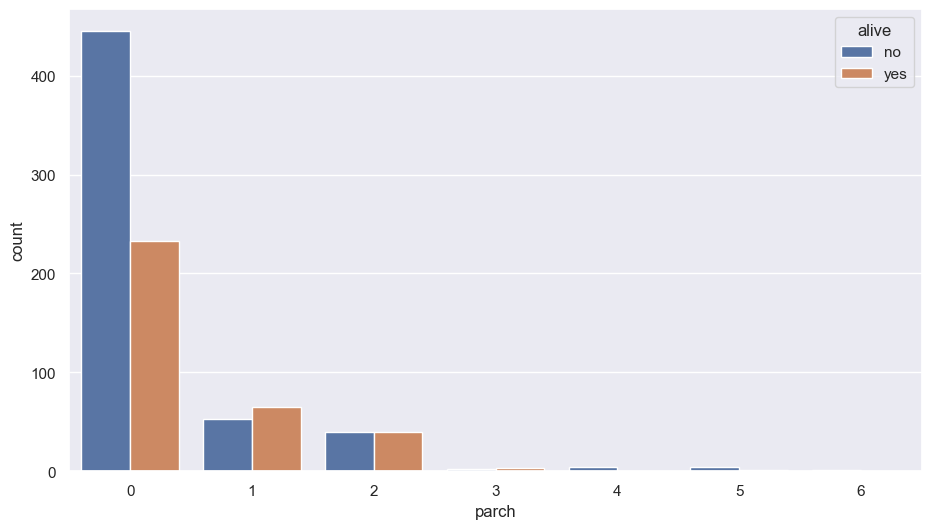

In [242]:
sns.countplot(x=td.parch,hue=td.alive,data=td)
plt.show()

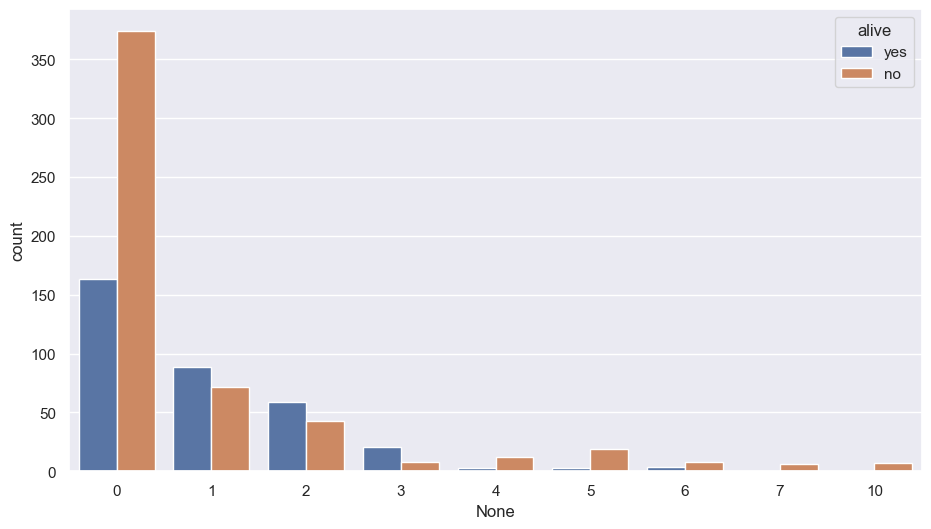

In [243]:
sns.countplot(x=td.sibsp+td.parch,hue=td.alive,data=td)
plt.show()  # family column combined

In [244]:
pd.crosstab(td.alive,td.sibsp+td.parch)

col_0,0,1,2,3,4,5,6,7,10
alive,,,,,,,,,
no,374,72,43,8,12,19,8,6,7
yes,163,89,59,21,3,3,4,0,0


If you have a family member from number 1 to 3 you have more chance to survive

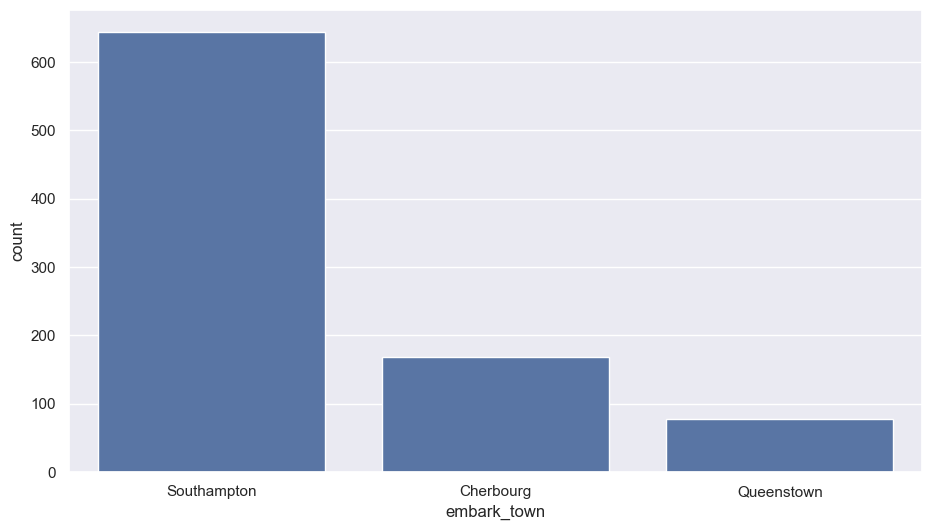

In [245]:
#embark_town
sns.countplot(x=td.embark_town,data=td)
plt.show()

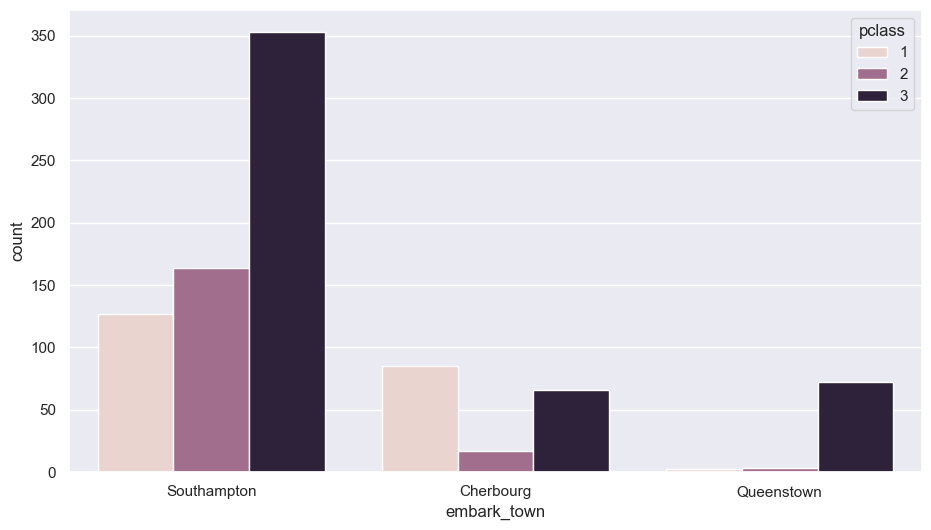

In [246]:
#embark_town
sns.countplot(x=td.embark_town,hue=td.pclass,data=td)
plt.show()

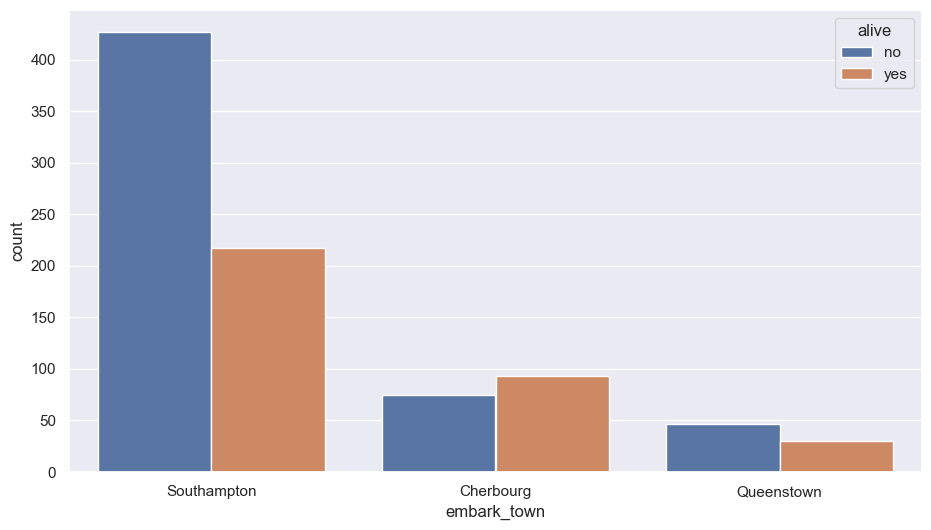

In [247]:
#embark_town
sns.countplot(x=td.embark_town,hue=td.alive,data=td)
plt.show()

###### Take away from this EDA
1. Female has more chance to survive
2. Child has more chane to survive
3. If family is 1,2 and 3 members then more chance to survive
4. Class 1st people has more chance to survive
5. More fare amount== 1st class only

###### `BEST CASE TO SURVIVE`
- Female child from 1st class with 1,2 or 3 family size

###### `WORST CASE TO SURVIVE`
- Male from 3rd class with 0 family size age in mid age 

In [248]:
td.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.00,-0.34,-0.08,-0.04,0.08,0.26,-0.56,-0.20
pclass,-0.34,1.00,-0.37,0.08,0.02,-0.55,0.09,0.14
age,-0.08,-0.37,1.00,-0.31,-0.19,0.10,0.28,0.20
sibsp,-0.04,0.08,-0.31,1.00,0.41,0.16,-0.25,-0.58
parch,0.08,0.02,-0.19,0.41,1.00,0.22,-0.35,-0.58
fare,0.26,-0.55,0.10,0.16,0.22,1.00,-0.18,-0.27
adult_male,-0.56,0.09,0.28,-0.25,-0.35,-0.18,1.00,0.40
alone,-0.20,0.14,0.20,-0.58,-0.58,-0.27,0.40,1.00


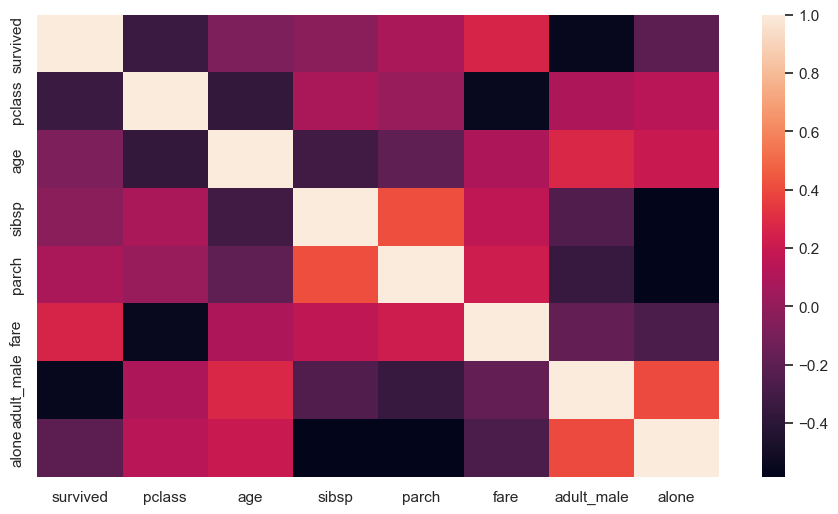

In [249]:
# Corelation
sns.heatmap(td.corr(numeric_only=True))
plt.show()

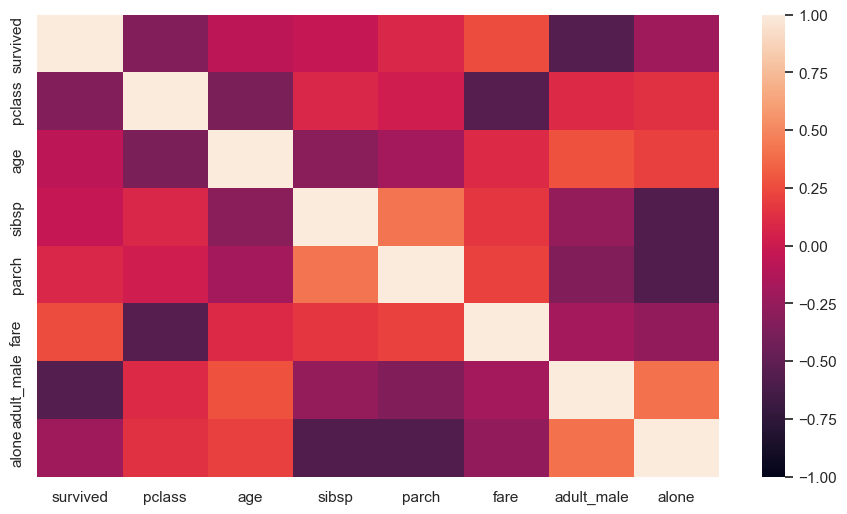

In [250]:
sns.heatmap(td.corr(numeric_only=True),vmin=-1) # min range to -1
plt.show()

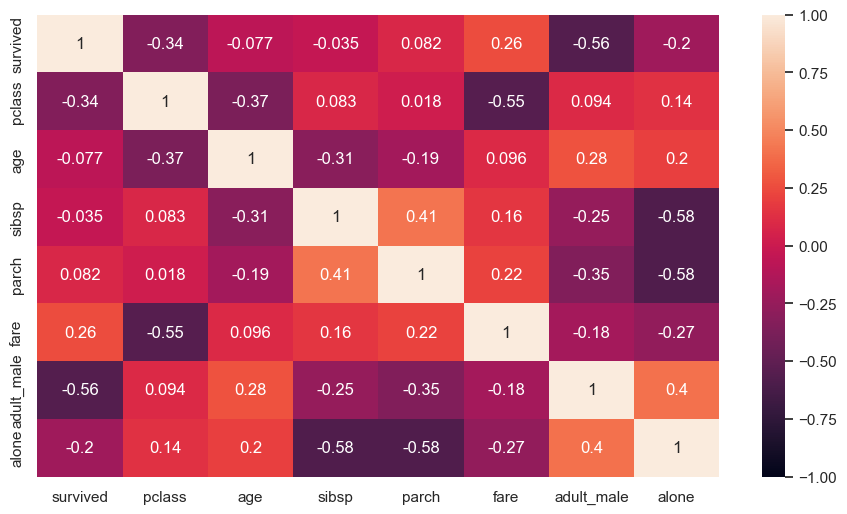

In [251]:
sns.heatmap(td.corr(numeric_only=True),vmin=-1,annot=True)
plt.show()

In [252]:
td.corr(numeric_only=True)[td.corr(numeric_only=True)<-.5 ]

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,NaN,NaN,NaN,NaN,NaN,NaN,-0.56,NaN
pclass,NaN,NaN,NaN,NaN,NaN,-0.55,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sibsp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.58
parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.58
fare,NaN,-0.55,NaN,NaN,NaN,NaN,NaN,NaN
adult_male,-0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alone,NaN,NaN,NaN,-0.58,-0.58,NaN,NaN,NaN


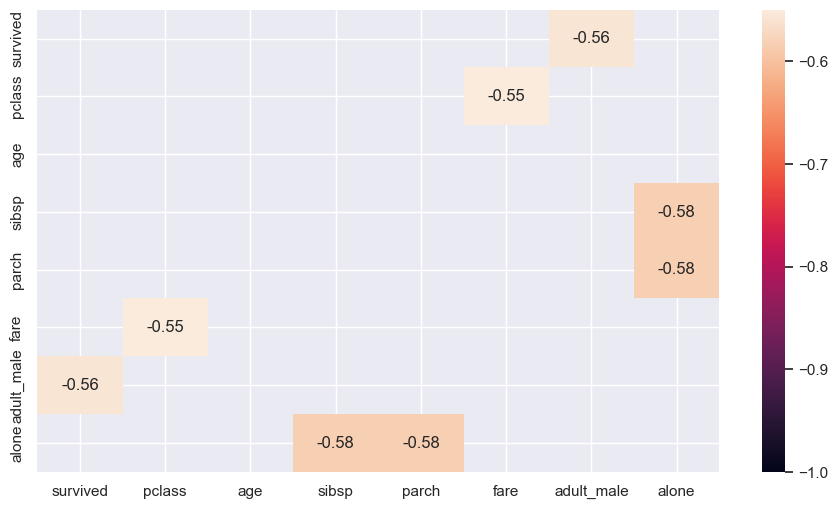

In [253]:
sns.heatmap(td.corr(numeric_only=True)[td.corr(numeric_only=True)<-.5 ],vmin=-1,annot=True)
plt.show()

In [254]:
#sns.heatmap(td.corr()[td.corr()<-.8 ] | td.corr()[td.corr()>.8 ],vmin=-1,annot=True)
#plt.show()

#### EDA END's

Checking the balancing

In [255]:
td.survived.value_counts(normalize=True)

survived
0   0.62
1   0.38
Name: proportion, dtype: float64

Checking the Null

In [256]:
td.shape # row / column

(891, 15)

In [257]:
td.shape[0] # row only

891

In [258]:
td.isnull().sum() # missing values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [259]:
td.isnull().sum()[td.isnull().sum()>0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [260]:
td.isnull().sum()[td.isnull().sum()>0]/td.shape[0]*100

age           19.87
embarked       0.22
deck          77.22
embark_town    0.22
dtype: float64

##### PLOT

In [261]:
td.drop(columns=['embarked', 'class', 'deck', 'alone'],inplace=True)
td.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alive
0,0,3,male,22.00,1,0,7.25,man,True,Southampton,no
1,1,1,female,38.00,1,0,71.28,woman,False,Cherbourg,yes
2,1,3,female,26.00,0,0,7.92,woman,False,Southampton,yes


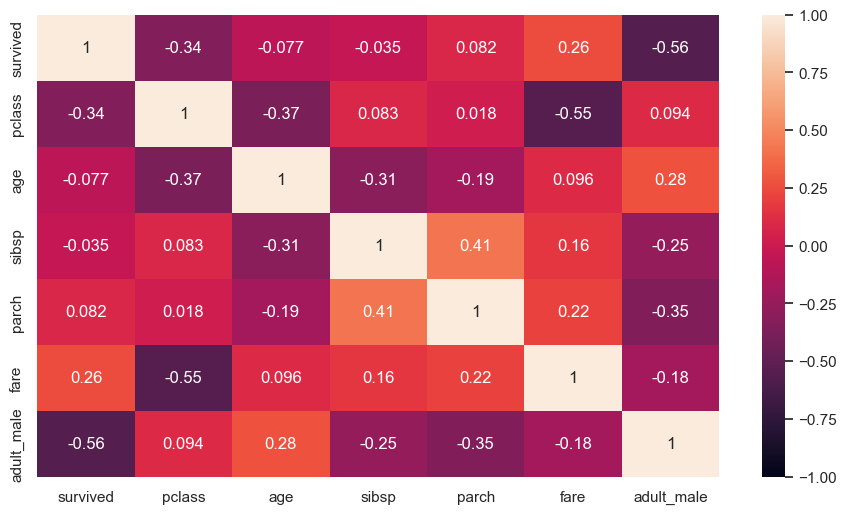

In [262]:
sns.heatmap(td.corr(numeric_only=True),vmin=-1,annot=True)
plt.show()

In [263]:
td.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'who',
       'adult_male', 'embark_town', 'alive'],
      dtype='object')

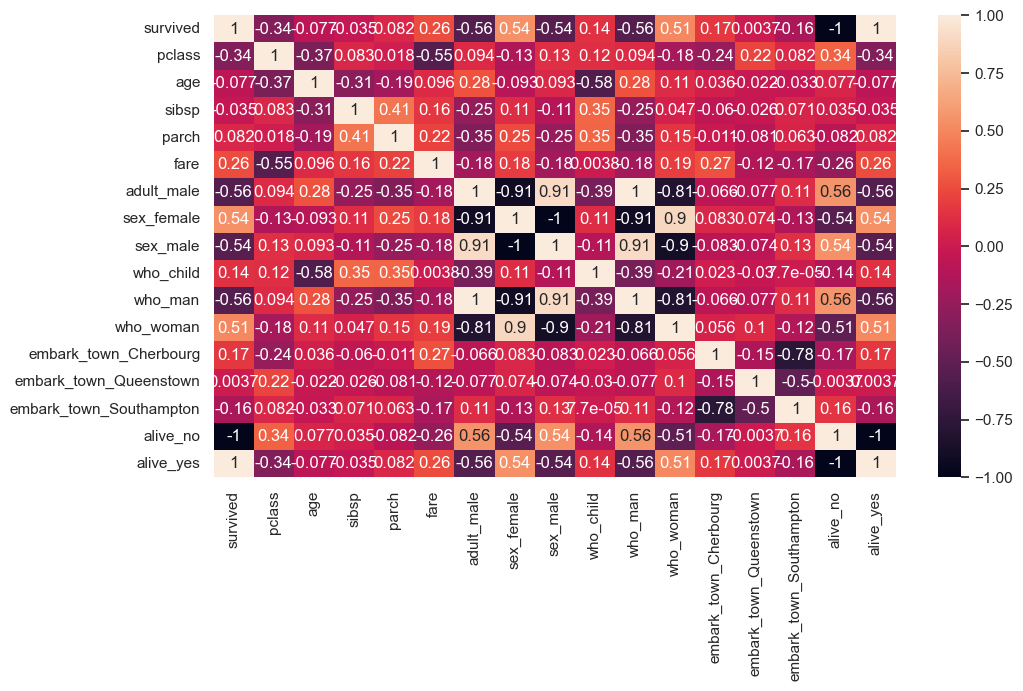

In [264]:
plt.figure(figsize=(11,6))
sns.heatmap(pd.get_dummies(td[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'who',
       'adult_male', 'embark_town', 'alive']]).corr(),vmin=-1,annot=True)
plt.show()

In [265]:
td.who.value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

<Axes: xlabel='who'>

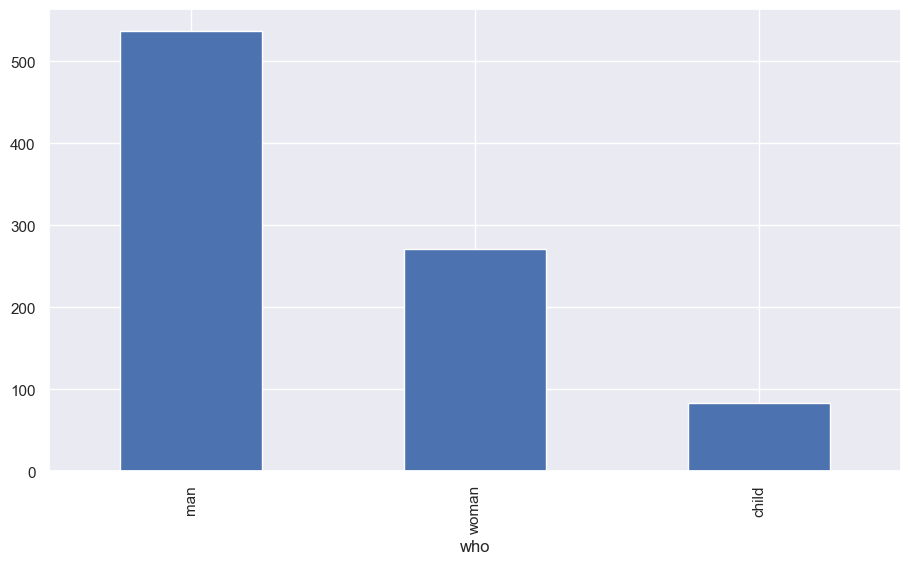

In [266]:
td.who.value_counts().plot(kind="bar")

In [267]:
td.who[:10]

0      man
1    woman
2    woman
3    woman
4      man
5      man
6      man
7    child
8    woman
9    child
Name: who, dtype: object

In [268]:
def child(x):
    if x=="man":
        return 0
    elif x=="woman":
        return 0
    else:
        return 1

In [269]:
td["child"]=td.who.apply(child)

In [270]:
td.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alive,child
0,0,3,male,22.00,1,0,7.25,man,True,Southampton,no,0
1,1,1,female,38.00,1,0,71.28,woman,False,Cherbourg,yes,0


In [271]:
td.child[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    1
Name: child, dtype: int64

In [272]:
td.drop(columns=['who','adult_male','alive'],inplace =True)
td.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,child
0,0,3,male,22.00,1,0,7.25,Southampton,0
1,1,1,female,38.00,1,0,71.28,Cherbourg,0


In [273]:
td.pclass[:10]

0    3
1    1
2    3
3    1
4    3
5    3
6    1
7    3
8    3
9    2
Name: pclass, dtype: int64

In [274]:
td.pclass.replace({3:1,1:3},inplace=True)  # FOR ML MODEL 
td.pclass[:10]

0    1
1    3
2    1
3    3
4    1
5    1
6    3
7    1
8    1
9    2
Name: pclass, dtype: int64

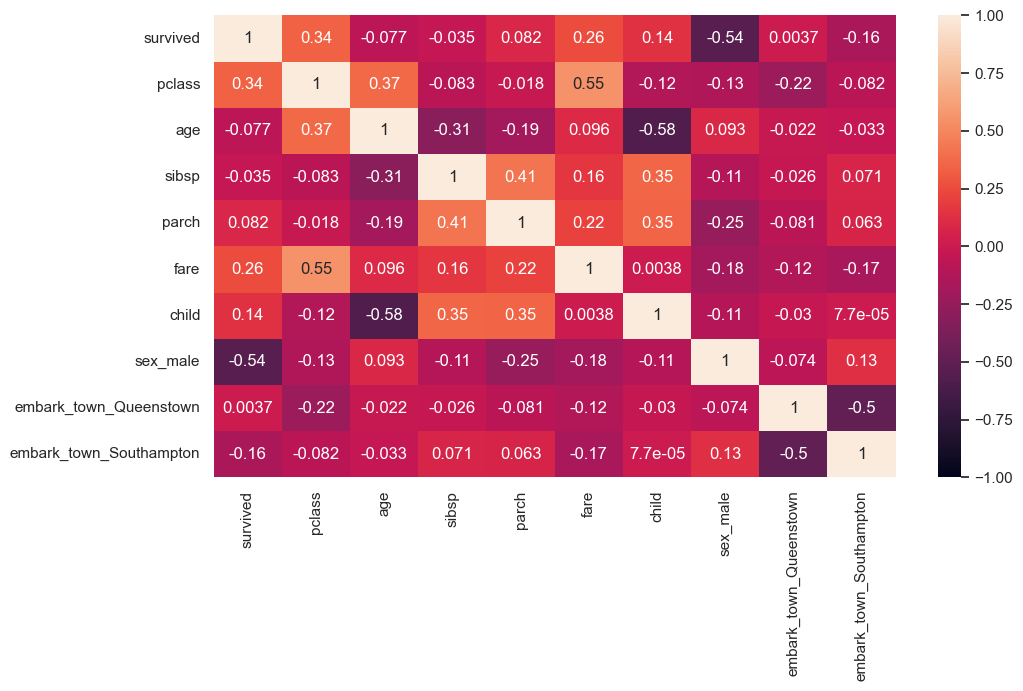

In [275]:
sns.set(rc={"figure.figsize":(11,6)})
sns.heatmap(pd.get_dummies(td,drop_first=True).corr(),vmin=-1,annot=True)
plt.show()

In [276]:
td["family"]=td.sibsp+td.parch # feature eng part
td.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,child,family
0,0,1,male,22.00,1,0,7.25,Southampton,0,1
1,1,3,female,38.00,1,0,71.28,Cherbourg,0,1


In [277]:
td.drop(columns=["parch","sibsp"],inplace=True)
td.head(2)

,survived,pclass,sex,age,fare,embark_town,child,family
0,0,1,male,22.00,7.25,Southampton,0,1
1,1,3,female,38.00,71.28,Cherbourg,0,1


<Axes: xlabel='family'>

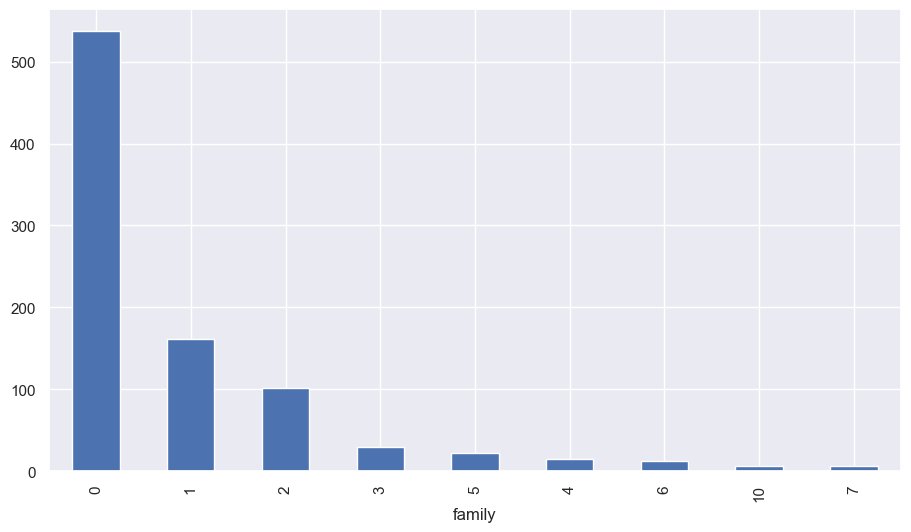

In [278]:
td.family.value_counts().plot(kind="bar")
#for seaborn
#sns.countplot(x=ts.family,data=td)

### Hadelling null value

In [279]:
td.isnull().sum()[td.isnull().sum()>0] # boolean index / broadcasting

age            177
embark_town      2
dtype: int64

In [280]:
td.age.fillna(td.age.mean(),inplace=True)
td.embark_town.fillna(td.embark_town.mode()[0],inplace=True)

In [281]:
td.isnull().sum()[td.isnull().sum()>0]

Series([], dtype: int64)

### Encoding

In [282]:
td=pd.get_dummies(td,drop_first=True)

Spliting dependent and independent features

In [283]:
target=td.survived
td.drop(columns="survived",inplace=True)

In [284]:
td.head(2)

,pclass,age,fare,child,family,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,22.00,7.25,0,1,True,False,True
1,3,38.00,71.28,0,1,False,False,False


<Axes: >

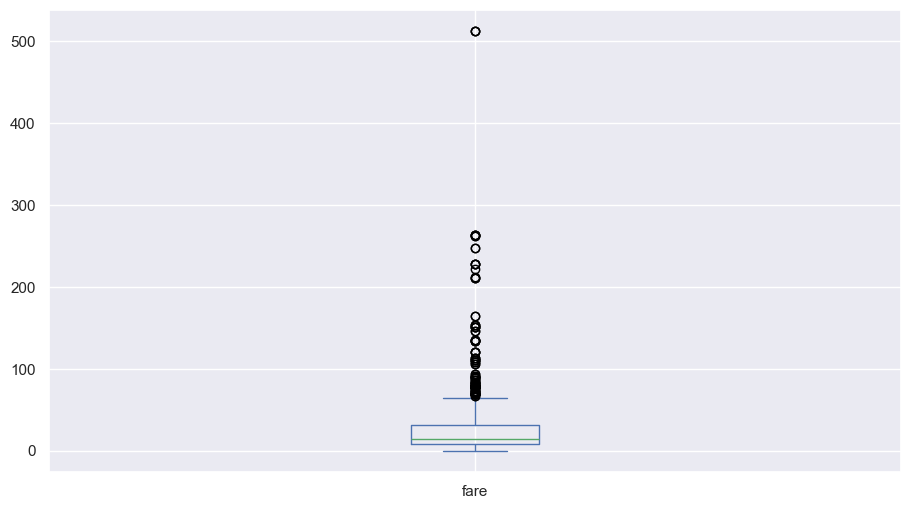

In [285]:
td.fare.plot(kind="box")

<Axes: >

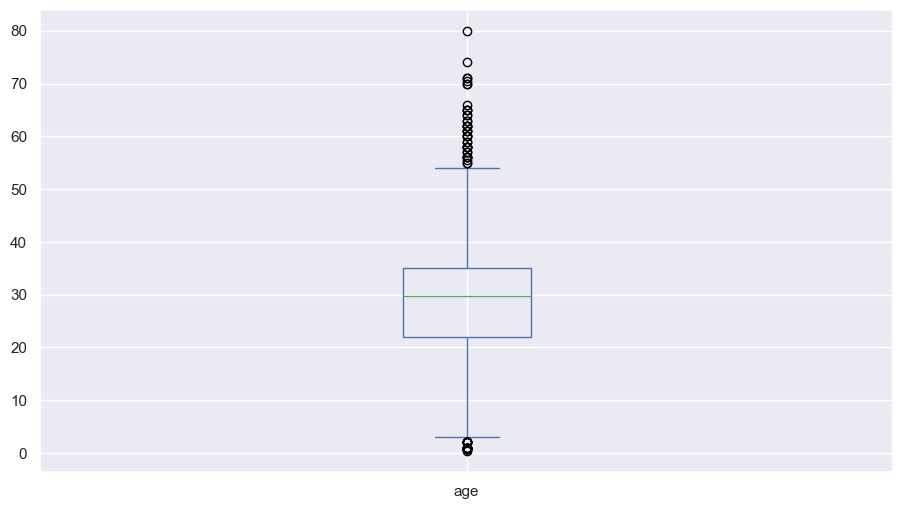

In [286]:
td.age.plot(kind="box")

<Axes: ylabel='Frequency'>

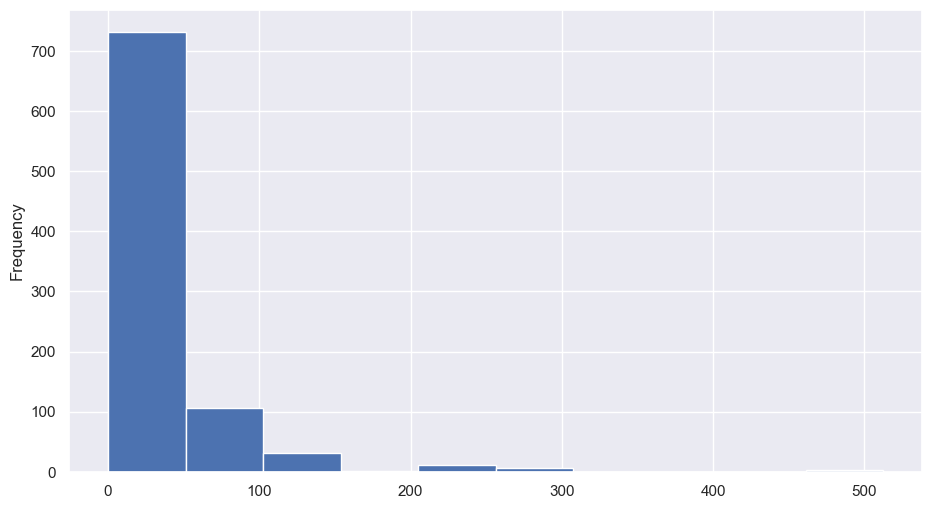

In [287]:
td.fare.plot(kind="hist")

<Axes: ylabel='Frequency'>

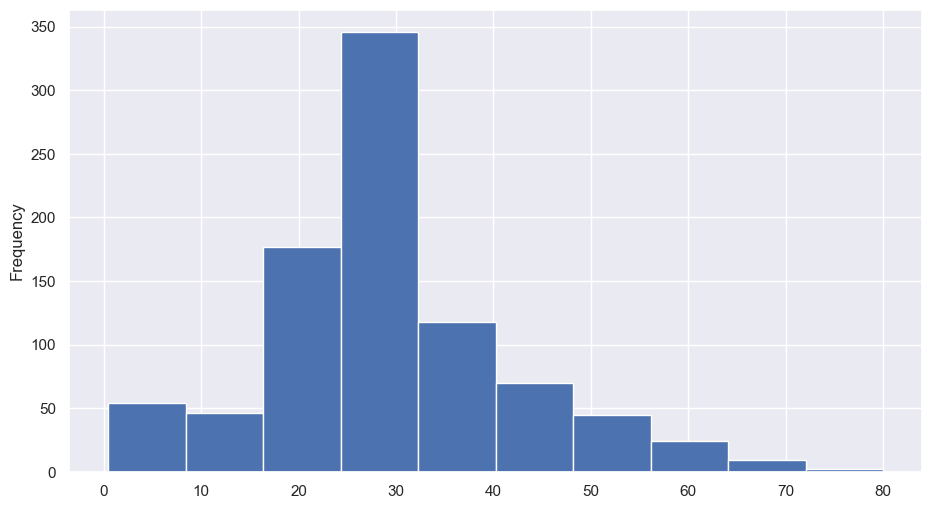

In [288]:
td.age.plot(kind="hist")

Out liner removal

In [289]:
td.fare.nlargest(5)

258   512.33
679   512.33
737   512.33
27    263.00
88    263.00
Name: fare, dtype: float64

In [290]:
td.fare[td.fare>300]=300

In [291]:
td.fare[td.fare>300]

Series([], Name: fare, dtype: float64)

In [292]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [293]:
x,xt,y,yt=train_test_split(td,target,
                           test_size=.10,
                           stratify=target,
                           random_state=42)

In [294]:
print(x.shape,"\n",xt.shape,"\n",y.shape,"\n",yt.shape)

(801, 8) 
 (90, 8) 
 (801,) 
 (90,)


In [295]:
mms=MinMaxScaler()

- We dont want min max scaler learn about the test data 
- If we do not seperate this it can cause data leakage

In [296]:
x[["age","fare"]]=mms.fit_transform(x[["age","fare"]])
xt[["age","fare"]]=mms.transform(xt[["age","fare"]])

In [297]:
x.head(2)

,pclass,age,fare,child,family,sex_male,embark_town_Queenstown,embark_town_Southampton
86,1,0.20,0.11,0,4,True,False,True
329,3,0.20,0.19,0,1,False,False,False


In [298]:
xt.head(2)

,pclass,age,fare,child,family,sex_male,embark_town_Queenstown,embark_town_Southampton
530,2,0.02,0.09,1,2,False,False,True
401,1,0.32,0.03,0,0,True,False,True


<Axes: ylabel='Frequency'>

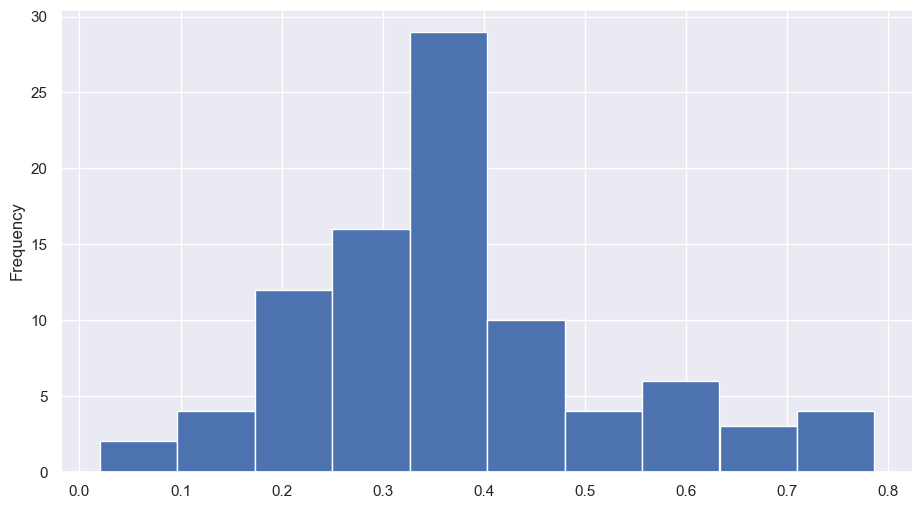

In [299]:
xt.age.plot(kind="hist")

<Axes: ylabel='Frequency'>

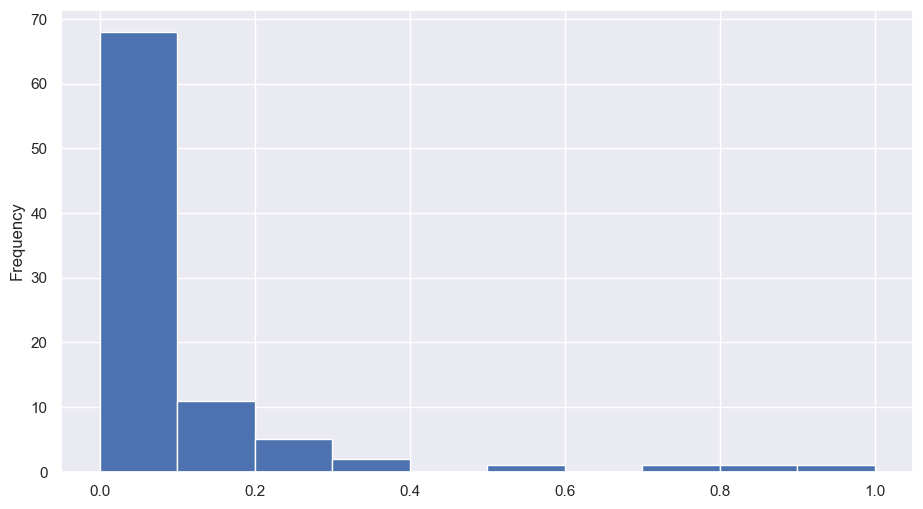

In [300]:
xt.fare.plot(kind="hist")

Importing Algo metrix

In [301]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [302]:
from sklearn.linear_model import LogisticRegression

In [303]:
logi=LogisticRegression()

In [304]:
logi.fit(x,y)

LogisticRegression()

In [305]:
logi_result=logi.predict(xt)# 10 independent value pred

In [306]:
logi_result[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [307]:
accuracy_score(yt,logi_result)*100

77.77777777777779

In [308]:
print("Confusion Matrix\n",confusion_matrix(yt,logi_result))

Confusion Matrix
 [[46  9]
 [11 24]]


#### ML ALGORITHMS

In [309]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [310]:
dt=DecisionTreeClassifier()
lr=LogisticRegression(max_iter=1000)
sv=SVC()
knn=KNeighborsClassifier()
nb=GaussianNB()

In [311]:
models=[dt,lr,sv,knn,nb]

In [312]:
for model in models:
    model.fit(x,y)
    result=model.predict(xt)
    print(f"{round(accuracy_score(yt,result)*100,2)} is the accuracy for {model}")

78.89 is the accuracy for DecisionTreeClassifier()
77.78 is the accuracy for LogisticRegression(max_iter=1000)
78.89 is the accuracy for SVC()
75.56 is the accuracy for KNeighborsClassifier()
77.78 is the accuracy for GaussianNB()


In [313]:
svc=SVC()
svc.fit(x,y)
r=svc.predict(xt)
print(f"{round(accuracy_score(yt,r)*100,2)} is the accuracy for {svc}")

78.89 is the accuracy for SVC()


In [314]:
print(classification_report(yt,r))
print("-*-"*10)
print("Confusion Matrix\n",confusion_matrix(yt,r))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        55
           1       0.75      0.69      0.72        35

    accuracy                           0.79        90
   macro avg       0.78      0.77      0.77        90
weighted avg       0.79      0.79      0.79        90

-*--*--*--*--*--*--*--*--*--*-
Confusion Matrix
 [[47  8]
 [11 24]]


### Ensemble Algoes

In [315]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

###### Bagging Algos

In [316]:
md=[]
for i in models:
    md.append((str(i)[:-2],i))
md

[('DecisionTreeClassifier', DecisionTreeClassifier()),
 ('LogisticRegression(max_iter=100', LogisticRegression(max_iter=1000)),
 ('SVC', SVC()),
 ('KNeighborsClassifier', KNeighborsClassifier()),
 ('GaussianNB', GaussianNB())]

In [317]:
rf=RandomForestClassifier()
vc=VotingClassifier(md)

In [318]:
for mod in [rf,vc]:
    mod.fit(x,y)
    res=mod.predict(xt)
    print(f"{round(accuracy_score(yt,res)*100,2)} is the accuracy for {mod}")

78.89 is the accuracy for RandomForestClassifier()
80.0 is the accuracy for VotingClassifier(estimators=[('DecisionTreeClassifier',
                              DecisionTreeClassifier()),
                             ('LogisticRegression(max_iter=100',
                              LogisticRegression(max_iter=1000)),
                             ('SVC', SVC()),
                             ('KNeighborsClassifier', KNeighborsClassifier()),
                             ('GaussianNB', GaussianNB())])


In [319]:
rfc=RandomForestClassifier()
rfc.fit(x,y)
rfc_res=rfc.predict(xt)
print(f"{round(accuracy_score(yt,rfc_res)*100,2)} is the accuracy for {rfc}")
print(classification_report(yt,rfc_res))
print("-*-"*10)
print("Confusion Matrix\n",confusion_matrix(yt,rfc_res))

78.89 is the accuracy for RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        55
           1       0.74      0.71      0.72        35

    accuracy                           0.79        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.79      0.79      0.79        90

-*--*--*--*--*--*--*--*--*--*-
Confusion Matrix
 [[46  9]
 [10 25]]


##### Boosting

In [320]:
gb=GradientBoostingClassifier()
ada=AdaBoostClassifier()
xgb=XGBClassifier()

In [321]:
for boost in [gb,ada,xgb]:
    boost.fit(x,y)
    res=boost.predict(xt)
    print(f"{round(accuracy_score(yt,res)*100,2)} is the accuracy for {boost}")

80.0 is the accuracy for GradientBoostingClassifier()
80.0 is the accuracy for AdaBoostClassifier()
76.67 is the accuracy for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [322]:
gradb=GradientBoostingClassifier()
gradb.fit(x,y)
res=gradb.predict(xt)
print(f"\n{round(accuracy_score(yt,res)*100,2)} is the accuracy for {gradb}")
print("-*-"*10)
print(classification_report(yt,rfc_res))
print("-*-"*10)
print("Confusion Matrix\n",confusion_matrix(yt,rfc_res))


80.0 is the accuracy for GradientBoostingClassifier()
-*--*--*--*--*--*--*--*--*--*-
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        55
           1       0.74      0.71      0.72        35

    accuracy                           0.79        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.79      0.79      0.79        90

-*--*--*--*--*--*--*--*--*--*-
Confusion Matrix
 [[46  9]
 [10 25]]
